# Example of usage 

Notebook imports R-metric script and demonstrates usage

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import R_metric_git as rmg # import functions from R-metric script
import xarray as xr
%matplotlib inline

In [12]:
# velocity file
da_V = xr.open_dataarray('/scratch3/mali/data/ERA_5/V250/update_Nov_2020/V250_1985.nc')
da_V

<xarray.DataArray 'V' (time: 1460, lev: 1, lat: 361, lon: 720)>
[379483200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 1.0
  * time     (time) datetime64[ns] 1985-01-01 ... 1985-12-31T18:00:00
Attributes:
    long_name:  unknown (please add with NCO)
    units:      unknown (please add with NCO)

In [13]:
# calculate hovmöller diagram
hov = rmg.calc_hov(da=da_V.sel(lev=1.0), lat1=35, lat2=65, dim='lat')

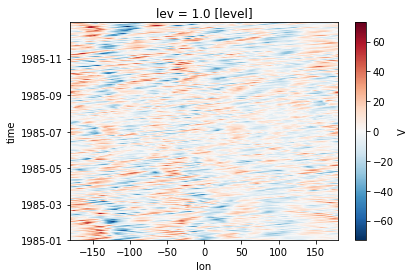

In [14]:
hov.plot()

In [12]:
len(hov.shape)

2

In [22]:
# apply time-filtering
hov_rm = hov.rolling(time=57, center=True).mean().dropna('time')
var_complex = rmg.wave_filter(da=hov_rm)

Starting R-metric calculations at 2021-11-30 11:15:37.885566


In [20]:
ds = hov_rm.to_dataset()
# R-metric is the modulus of the complex number signal
ds['R_metric'] = (('time', 'lon'), np.absolute(var_complex)) 
# real part is the filtered wave
ds['Filtered_wave'] = (('time', 'lon'), np.real(var_complex)) # real part

Text(0.5, 1.0, 'R-metric')

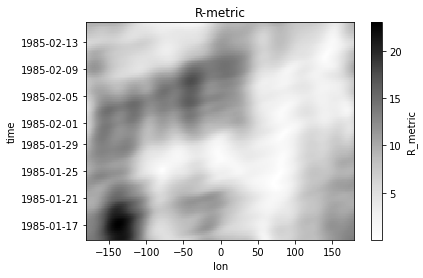

In [27]:
ds.R_metric.sel(time=slice('1985-01-15', '1985-02-15')).plot(cmap='Greys')
plt.title('R-metric')